<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#(1)-Data-Loading-and-Preprocessing" data-toc-modified-id="(1)-Data-Loading-and-Preprocessing-1">(1) Data Loading and Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Split" data-toc-modified-id="Time-Series-Split-1.1">Time Series Split</a></span></li><li><span><a href="#Some-properties-of-the-dataset-class" data-toc-modified-id="Some-properties-of-the-dataset-class-1.2">Some properties of the dataset class</a></span></li></ul></li><li><span><a href="#(2)-Production-Policy-Replication" data-toc-modified-id="(2)-Production-Policy-Replication-2">(2) Production Policy Replication</a></span></li><li><span><a href="#(3)-Off-Policy-Evaluation-(OPE)" data-toc-modified-id="(3)-Off-Policy-Evaluation-(OPE)-3">(3) Off-Policy Evaluation (OPE)</a></span><ul class="toc-item"><li><span><a href="#Estimate-the-mean-reward-function" data-toc-modified-id="Estimate-the-mean-reward-function-3.1">Estimate the mean reward function</a></span></li></ul></li><li><span><a href="#(4)-Evaluation-of-OPE" data-toc-modified-id="(4)-Evaluation-of-OPE-4">(4) Evaluation of OPE</a></span></li></ul></div>

In [1]:
from sklearn.linear_model import LogisticRegression
# import open bandit pipeline (obp)
from obp import obp
from obp.obp.dataset import OpenBanditDataset
from obp.obp.policy import BernoulliTS
from obp.obp.ope import (
    OffPolicyEvaluation,
    RegressionModel,
    DirectMethod,
    InverseProbabilityWeighting,
    DoublyRobust
)

In [2]:
# obp version
print(obp.__version__)

0.3.3


## (1) Data Loading and Preprocessing

- `OpenBanditDataset` class 
- It takes behavior policy ('bts' or 'random') 
- and campaign ('all', 'men', or 'women') as inputs 
- and provides dataset preprocessing.

In [3]:
# load and preprocess raw data in "All" campaign collected by the Random policy (behavior policy here)
# When `data_path` is not given, this class downloads the small-sized version of the Open Bandit Dataset.
dataset = OpenBanditDataset(behavior_policy='random', campaign='all')

INFO:obp.obp.dataset.real:When `data_path` is not given, this class downloads the example small-sized version of the Open Bandit Dataset.


In [4]:
# obtain logged bandit feedback generated by behavior policy
bandit_feedback = dataset.obtain_batch_bandit_feedback()

# `bandit_feedback` is a dictionary storing logged bandit feedback
bandit_feedback.keys()

dict_keys(['n_rounds', 'n_actions', 'action', 'position', 'reward', 'pscore', 'context', 'action_context'])

### Time Series Split

In [7]:
time_bandit = dataset.obtain_batch_bandit_feedback(is_timeseries_split=True)

In [5]:
bandit_feedback

{'n_rounds': 10000,
 'n_actions': 80,
 'action': array([14, 14, 27, ..., 32, 13, 47]),
 'position': array([2, 2, 2, ..., 2, 1, 0]),
 'reward': array([0, 0, 0, ..., 0, 0, 0]),
 'pscore': array([0.0125, 0.0125, 0.0125, ..., 0.0125, 0.0125, 0.0125]),
 'context': array([[1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 1, ..., 0, 0, 1],
        [1, 0, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=uint8),
 'action_context': array([[ 0.00000000e+00,  5.00000000e+00,  1.00000000e+01,
          4.00000000e+00, -4.99171626e-01],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+01,
          4.00000000e+00, -5.43775368e-01],
        [ 2.00000000e+00,  1.00000000e+00,  1.20000000e+01,
          1.00000000e+00,  9.72751855e-01],
        [ 3.00000000e+00,  2.00000000e+00,  1.50000000e+01,
          6.00000000e+00, -5.21473497e-01],
        [ 4.00000000e+00,  1.00000000e+01,  1.00000000e+00,
          1.00000000e

In [11]:
time_bandit[0]

{'n_rounds': 7000,
 'n_actions': 80,
 'action': array([14, 14, 27, ..., 77, 37, 38]),
 'position': array([2, 2, 2, ..., 2, 2, 0]),
 'reward': array([0, 0, 0, ..., 0, 0, 0]),
 'pscore': array([0.0125, 0.0125, 0.0125, ..., 0.0125, 0.0125, 0.0125]),
 'context': array([[1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 1, ..., 0, 0, 0]], dtype=uint8),
 'action_context': array([[ 0.00000000e+00,  5.00000000e+00,  1.00000000e+01,
          4.00000000e+00, -4.99171626e-01],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+01,
          4.00000000e+00, -5.43775368e-01],
        [ 2.00000000e+00,  1.00000000e+00,  1.20000000e+01,
          1.00000000e+00,  9.72751855e-01],
        [ 3.00000000e+00,  2.00000000e+00,  1.50000000e+01,
          6.00000000e+00, -5.21473497e-01],
        [ 4.00000000e+00,  1.00000000e+01,  1.00000000e+00,
          1.00000000e+

### Some properties of the dataset class

In [4]:
# name of the dataset is 'obd' (open bandit dataset)
dataset.dataset_name

'obd'

In [5]:
# number of actions of the "All" campaign is 80
dataset.n_actions

80

In [6]:
# small sample example data has 10,000 rounds
dataset.n_rounds

10000

In [7]:
# default context (feature) engineering creates context vector with 20 dimensions
dataset.dim_context

20

In [6]:
# ZOZOTOWN recommendation interface has three positions
# (please see https://github.com/st-tech/zr-obp/blob/master/images/recommended_fashion_items.png)
dataset.len_list

3

## (2) Production Policy Replication

- replicate the BernoulliTS policy implemented on the ZOZOTOWN recommendation interface during the data collection period.

- we use **Bernoulli TS** implemented in the policy module as an evaluation policy. 
- By activating its `is_zozotown_prior` argument, we can replicate (the policy parameters of) BernoulliTS used in ZOZOTOWN production.
- (When `is_zozotown_prior=False`, non-informative prior distribution is used.)

In [22]:
evaluation_policy = BernoulliTS(
    n_actions=dataset.n_actions, 
    len_list=dataset.len_list, 
    is_zozotown_prior=True, # replicate the BernoulliTS policy in the ZOZOTOWN production
    campaign="all",
    random_state=12345,
)

In [23]:
# compute the action choice probabilities by the evaluation policy using Monte Carlo simulation
action_dist = evaluation_policy.compute_batch_action_dist(
    n_sim=100000, n_rounds=bandit_feedback["n_rounds"],
)

# action_dist is an array of shape (n_rounds, n_actions, len_list) 
# representing the distribution over actions by the evaluation policy
action_dist

array([[[0.01078, 0.00931, 0.00917],
        [0.00167, 0.00077, 0.00076],
        [0.0058 , 0.00614, 0.00631],
        ...,
        [0.0008 , 0.00087, 0.00071],
        [0.00689, 0.00724, 0.00755],
        [0.0582 , 0.07603, 0.07998]],

       [[0.01078, 0.00931, 0.00917],
        [0.00167, 0.00077, 0.00076],
        [0.0058 , 0.00614, 0.00631],
        ...,
        [0.0008 , 0.00087, 0.00071],
        [0.00689, 0.00724, 0.00755],
        [0.0582 , 0.07603, 0.07998]],

       [[0.01078, 0.00931, 0.00917],
        [0.00167, 0.00077, 0.00076],
        [0.0058 , 0.00614, 0.00631],
        ...,
        [0.0008 , 0.00087, 0.00071],
        [0.00689, 0.00724, 0.00755],
        [0.0582 , 0.07603, 0.07998]],

       ...,

       [[0.01078, 0.00931, 0.00917],
        [0.00167, 0.00077, 0.00076],
        [0.0058 , 0.00614, 0.00631],
        ...,
        [0.0008 , 0.00087, 0.00071],
        [0.00689, 0.00724, 0.00755],
        [0.0582 , 0.07603, 0.07998]],

       [[0.01078, 0.00931, 0.00917],
  

## (3) Off-Policy Evaluation (OPE)

- estimate the performance of new decision making policies 
- using log data generated by behavior, past policies. 
- *InverseProbabilityWeighting (IPW)*, *DirectMethod (DM)*, and *Doubly Robust (DR)* estimators
- estimate the performance of Bernoulli TS using the logged bandit feedback. 

### Estimate the mean reward function 

In [13]:
# the estimated rewards are used by model-dependent estimators such as DM and DR
regression_model = RegressionModel(
    n_actions=dataset.n_actions,
    len_list=dataset.len_list,
    action_context=dataset.action_context,
    base_model=LogisticRegression(random_state=12345),
)

In [14]:
# please refer to https://arxiv.org/abs/2002.08536 about the details of the cross-fitting procedure.
estimated_rewards_by_reg_model = regression_model.fit_predict(
    context=bandit_feedback["context"],
    action=bandit_feedback["action"],
    reward=bandit_feedback["reward"],
    position=bandit_feedback["position"],
    pscore=bandit_feedback["pscore"],
    n_folds=3, # use 3-fold cross-fitting
    random_state=12345,
)

/Users/zimin/opt/anaconda3/envs/Bandits/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zimin/opt/anaconda3/envs/Bandits/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [19]:
estimated_rewards_by_reg_model.shape

(10000, 80, 3)

In [20]:
# estimate the policy value of BernoulliTS based on its action choice probabilities
# it is possible to set multiple OPE estimators to the `ope_estimators` argument
ope = OffPolicyEvaluation(
    bandit_feedback=bandit_feedback,
    ope_estimators=[InverseProbabilityWeighting(), DirectMethod(), DoublyRobust()]
)

In [24]:
# `summarize_off_policy_estimates` returns pandas dataframes including the OPE results
estimated_policy_value, estimated_interval = ope.summarize_off_policy_estimates(
    action_dist=action_dist, 
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model,
    n_bootstrap_samples=10000, # number of resampling performed in the bootstrap procedure.
    random_state=12345,
)

In [25]:
# the estimated policy value of the evaluation policy (the BernoulliTS policy)
# relative_estimated_policy_value is the policy value of the evaluation policy 
# relative to the ground-truth policy value of the behavior policy (the Random policy here)
estimated_policy_value

,estimated_policy_value,relative_estimated_policy_value
ipw,0.004553,1.198126
dm,0.003385,0.890885
dr,0.004647,1.222970


In [26]:
# estimated confidence intervals of policy value of BernoulliTS by OPE estimators
# (`mean` values in this dataframe is also estimated via the non-parametric bootstrap procedure 
# and is a bit different from the above values in `estimated_policy_value`)
estimated_interval

,mean,95.0% CI (lower),95.0% CI (upper)
ipw,0.004544,0.001531,0.009254
dm,0.003385,0.003338,0.003433
dr,0.004638,0.001625,0.009322


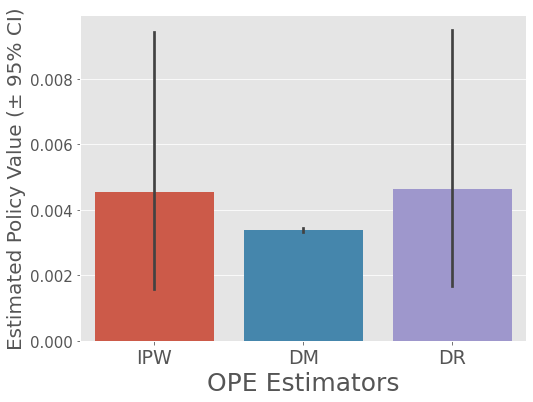

In [27]:
# visualize the estimated policy values of BernoulliTS by the three OPE estimators
# and their 95% confidence intervals (estimated by nonparametric bootstrap method)
ope.visualize_off_policy_estimates(
    action_dist=action_dist,
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model,
    n_bootstrap_samples=10000, # number of resampling performed in the bootstrap procedure
    random_state=12345,
)

Note that the OPE demonstration here is with the small size example version of our dataset. 
Please use its full size version (https://research.zozo.com/data.html) to produce more reasonable results.

## (4) Evaluation of OPE

- evaluates the estimation accuracy of OPE estimators.

- asses the accuracy of the estimator such as DM, IPW, and DR 
- by comparing its estimation with the ground-truth policy value estimated via the on-policy estimation from the Open Bandit Dataset.
- Possible, because the Open Bandit Dataset contains a set of *multiple* different logged bandit feedback datasets
- collected by running different policies on the same platform at the same time.

In [29]:
# we first calculate the ground-truth policy value of the evaluation policy
# , which is estimated by averaging the factual (observed) rewards contained in the dataset (on-policy estimation)
policy_value_bts = OpenBanditDataset.calc_on_policy_policy_value_estimate(
    behavior_policy='bts', campaign='all'
)

INFO:obp.obp.dataset.real:When `data_path` is not given, this class downloads the example small-sized version of the Open Bandit Dataset.


In [30]:
# evaluate the estimation performances of OPE estimators 
# by comparing the estimated policy values of BernoulliTS and its ground-truth.
# `evaluate_performance_of_estimators` returns a dictionary containing estimation performances of given estimators 
relative_ee = ope.summarize_estimators_comparison(
    ground_truth_policy_value=policy_value_bts,
    action_dist=action_dist,
    estimated_rewards_by_reg_model=estimated_rewards_by_reg_model,
    metric="relative-ee", # "relative-ee" (relative estimation error) or "se" (squared error)
)

# estimation performances of the three estimators (lower means accurate)
relative_ee

,relative-ee
ipw,0.084019
dm,0.193961
dr,0.106497


Please see [examples/obd](../obd) for a more sophisticated example of the evaluation of OPE with the Open Bandit Dataset.